In [1]:
import isolines as il
import matplotlib.pyplot as plt
%matplotlib inline


# Refining isolines' concave boundaries and smoothing

## 1. Default  knn walking isochrones from a point address

Finished downloading graph from OSM using osmnx, time elapsed: 7.076952695846558 seconds.


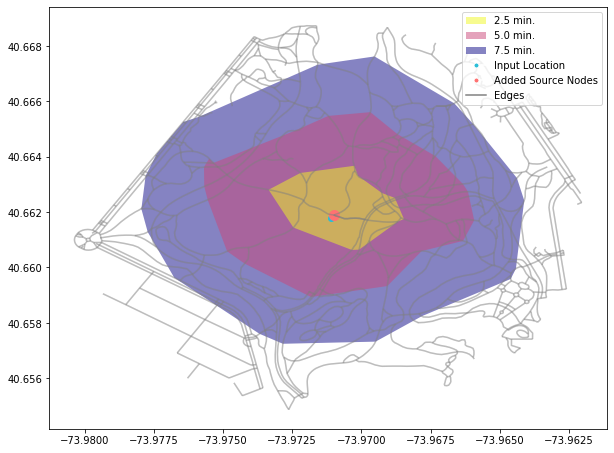

In [2]:
isochrones = il.OsmIsolines('Prospect Park, Brooklyn,NYC, USA',
                                 network_type = 'walk',
                                 metric = 'time',
                                 values=[2.5, 5, 7.5],
                                  speed = 300,
                                  unit= 'ft',
                                 address_type='point')
isochrones.plot_isolines(figsize = (10,10))

In [3]:
df = isochrones.get_isolines()
df.head()

,geometry,time
0,"POLYGON ((-73.9703483626031 40.66063239098003,...",2.5
1,"POLYGON ((-73.9718240127707 40.65893226627175,...",5.0
2,POLYGON ((-73.97283819800289 40.65724292064914...,7.5


### 1.1 inspecting underlying added nodes

Let's look at the original network nodes (green) and the added nodes (hollow nodes) in order to inspect our results 
<ul>
<li>
The isolines/isochrones are created using a concave hull algorithm, based on k-nearest-neighbors (knn) heuristic
</li>
<li>
The default tries to set the number of knn to roughly fit the number of target nodes - but that can be changed by specifying knn specifically
</li>
    <li>
Lowering the number of knns will allow us to refine the isolines/isochrones boundary if needed - we will do this next...
</li>
</ul>




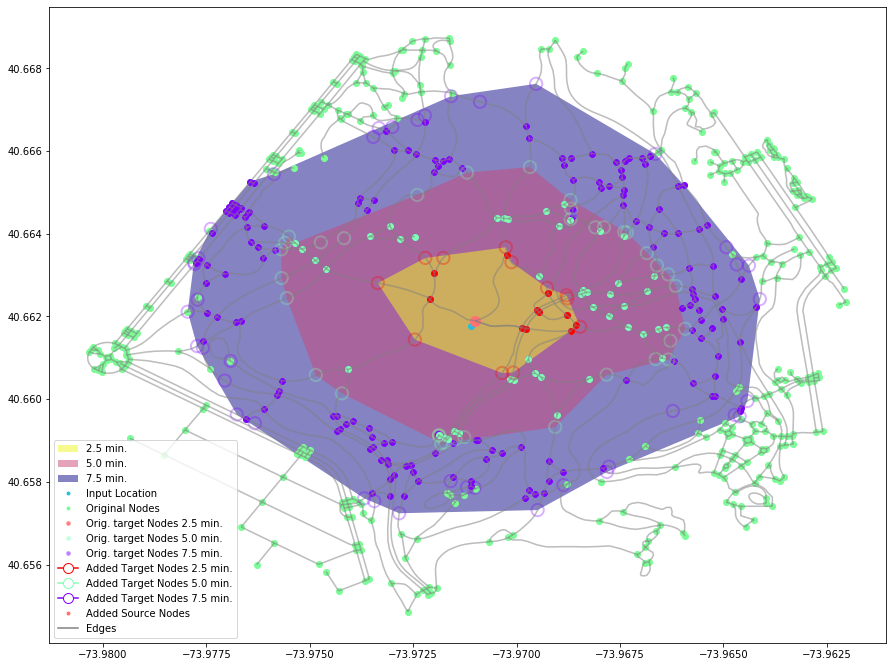

In [4]:
isochrones.plot_isolines(plot_nodes = True)

### 1.2 refining concave isolines - walking isochrones from a point address

We can play around with the number of knn to make our isolines/isochrones more or less refined
<ul>
<li>
Here we use 20 and 2 nearest neighbors - this results is somewhat finer concave hull isolines/isochrones
</li>

</ul>

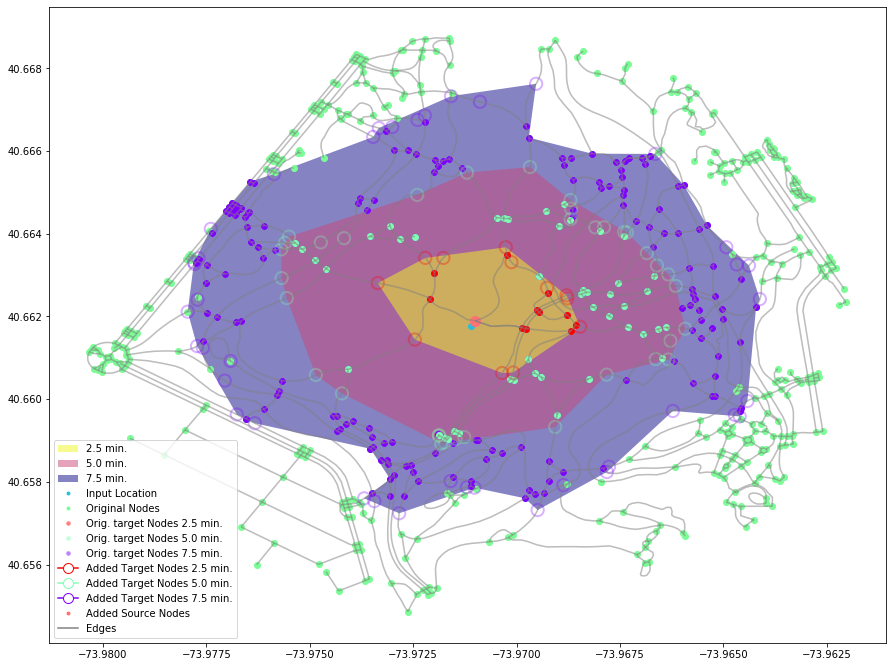

In [5]:
isochrones.change_isolines(knn = 20)
isochrones.plot_isolines(plot_nodes = True)

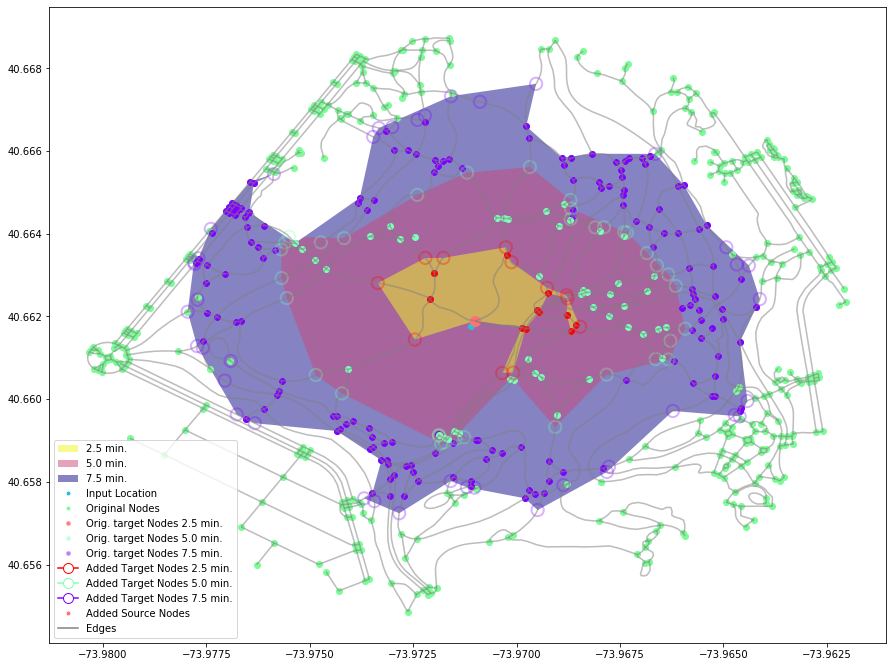

In [6]:
isochrones.change_isolines(knn = 2)
isochrones.plot_isolines(plot_nodes = True)

### 1.3 smoothing

you can smooth the isoline boundary for better visualization (on the expense of accuracy)

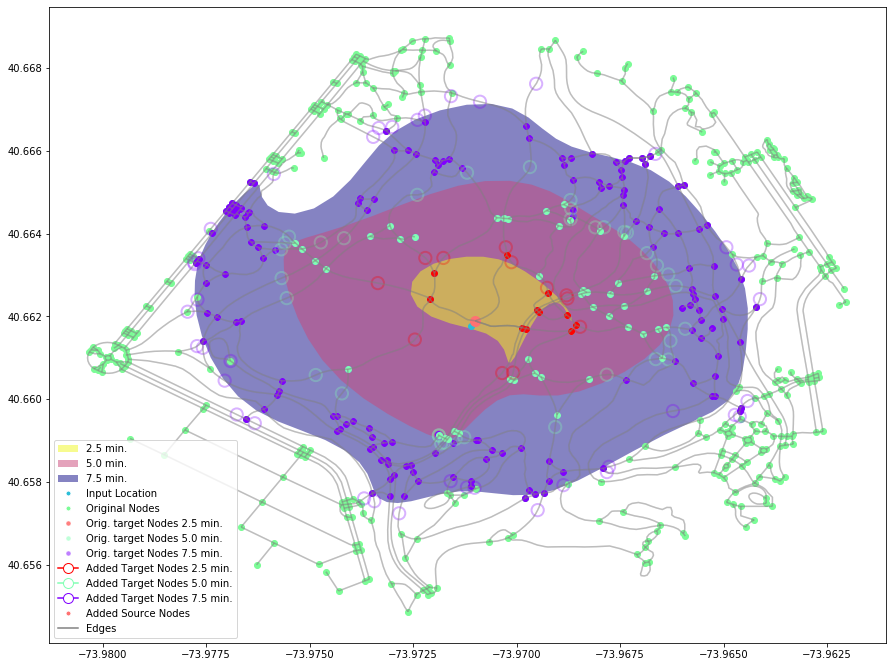

In [7]:
isochrones.change_isolines(smooth  = True)
isochrones.plot_isolines(plot_nodes = True)

### 1.4 another example 

Finished downloading graph from OSM using osmnx, time elapsed: 3.5361955165863037 seconds.


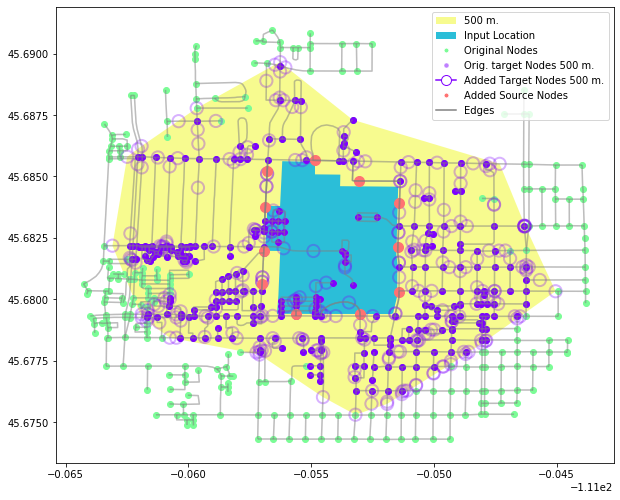

In [8]:
iso = il.OsmIsolines('Bozeman High School, Bozeman, Montana, USA',
                           values=[500],
                           sample = 200
                           )
iso.plot_isolines(plot_nodes=True, plot_source_nodes=True,figsize = (10,10))

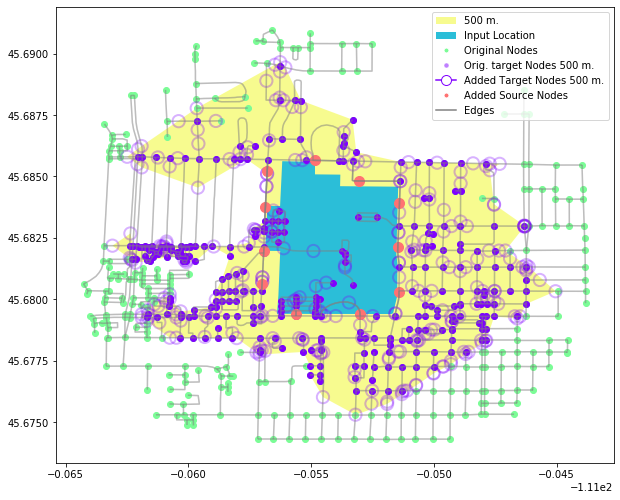

In [9]:
iso.change_isolines(knn = 10)
iso.plot_isolines(plot_nodes=True, plot_source_nodes=True,figsize = (10,10))